In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
AgeGroupDetails = pd.read_csv('/home/surya/Desktop/Term project 2020/Dataset_Question3/AgeGroupDetails.csv')
Covid_19_india = pd.read_csv('/home/surya/Desktop/Term project 2020/Dataset_Question3/covid_19_india.csv', parse_dates=['Date'], dayfirst=True)
HospitalBedsIndia = pd.read_csv('/home/surya/Desktop/Term project 2020/Dataset_Question3/HospitalBedsIndia.csv')
ICMRTestingDetails = pd.read_csv('/home/surya/Desktop/Term project 2020/Dataset_Question3/ICMRTestingDetails.csv',sep=r'\t', engine='python')
IndividualDetails = pd.read_csv('/home/surya/Desktop/Term project 2020/Dataset_Question3/IndividualDetails.csv')
Population_india_census2011 = pd.read_csv('/home/surya/Desktop/Term project 2020/Dataset_Question3/population_india_census2011.csv')

<h1>Question 1</h1>

In [2]:
AgeGroupDetails.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


Age group <b>20-29</b> is most infected

<h1>Question 2</h1>

In [3]:
Covid_19_india.head()
#  The entries are sorted by date

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df = Covid_19_india.copy()
rows, cols = df.shape

In [5]:
df.isnull().any()

Sno                         False
Date                        False
Time                        False
State/UnionTerritory        False
ConfirmedIndianNational     False
ConfirmedForeignNational    False
Cured                       False
Deaths                      False
Confirmed                   False
dtype: bool

Text(0.5, 1.0, 'Average observed cases per day (state-wise)')

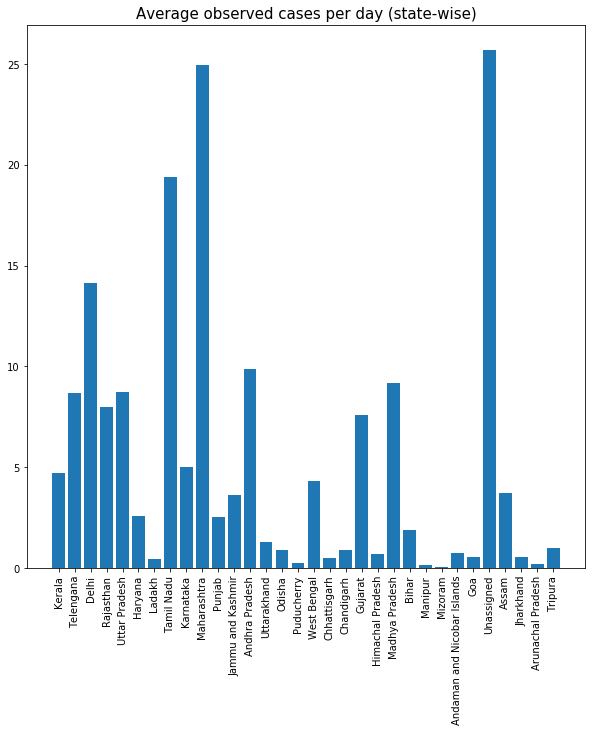

In [6]:
unique_states=df['State/UnionTerritory'].unique()
avg_obs_per_day=[]
for state in unique_states:
    obs_per_day=df['Confirmed'].loc[df['State/UnionTerritory']==state].diff()    # difference between the rows gives observations per day
    filler=df.Confirmed.loc[df['State/UnionTerritory']==state].values[0]         
    obs_per_day.fillna(filler,inplace=True)
    avg_obs_per_day.append(obs_per_day.mean())  
    
#plotting   
plt.figure(figsize=(10,10))
plt.bar(unique_states,avg_obs_per_day)
plt.xticks(unique_states,rotation=90)
plt.title('Average observed cases per day (state-wise)',fontsize=15)

Text(0.5, 1.0, 'Average recovered cases per day (state-wise)')

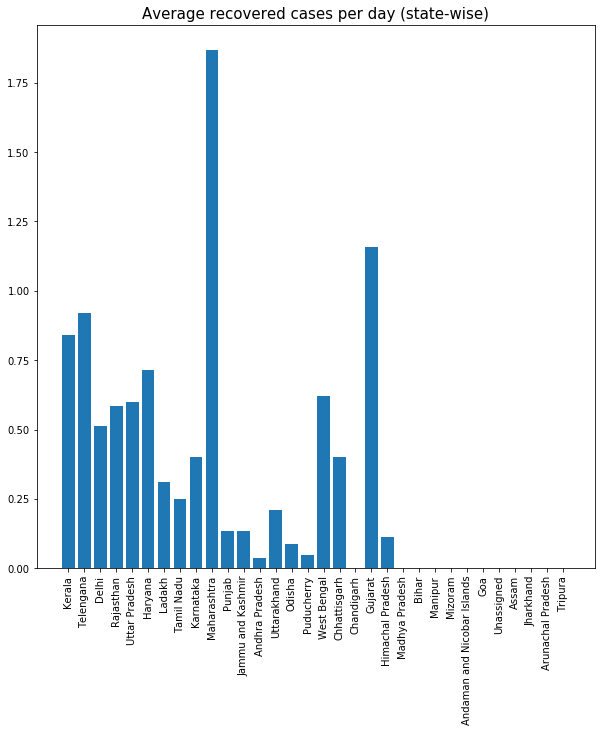

In [7]:
unique_states=df['State/UnionTerritory'].unique()
avg_rec_per_day=[]
for state in unique_states:
    rec_per_day=df['Cured'].loc[df['State/UnionTerritory']==state].diff()    # difference between the rows gives observations per day
    filler=df.Cured.loc[df['State/UnionTerritory']==state].values[0]         
    rec_per_day.fillna(filler,inplace=True)
    avg_rec_per_day.append(rec_per_day.mean())  
    
#plotting   
plt.figure(figsize=(10,10))
plt.bar(unique_states,avg_rec_per_day)
plt.xticks(unique_states,rotation=90)
plt.title('Average recovered cases per day (state-wise)',fontsize=15)

Text(0.5, 1.0, 'Average mortality cases per day (state-wise)')

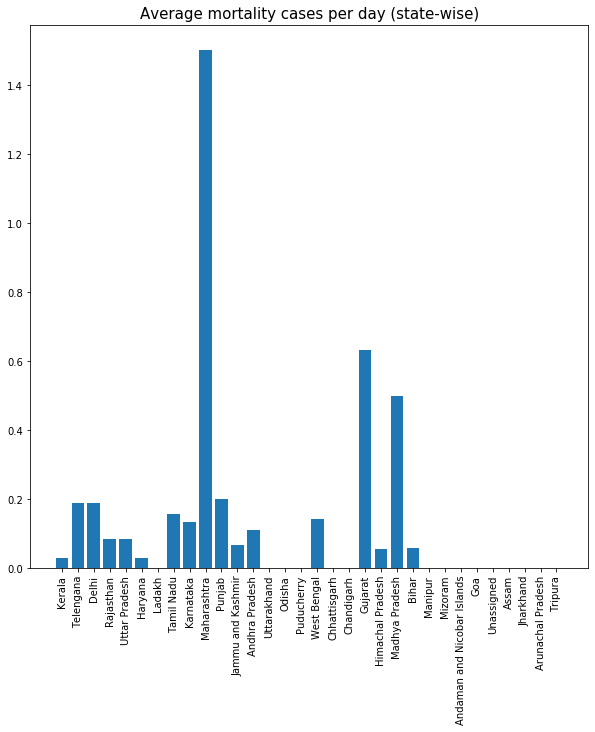

In [8]:
unique_states=df['State/UnionTerritory'].unique()
avg_deaths_per_day=[]
for state in unique_states:
    deaths_per_day=df['Deaths'].loc[df['State/UnionTerritory']==state].diff()    # difference between the rows gives observations per day
    filler=df.Deaths.loc[df['State/UnionTerritory']==state].values[0]         
    deaths_per_day.fillna(filler,inplace=True)
    avg_deaths_per_day.append(deaths_per_day.mean())  
    
#plotting   
plt.figure(figsize=(10,10))
plt.bar(unique_states,avg_deaths_per_day)
plt.xticks(unique_states,rotation=90)
plt.title('Average mortality cases per day (state-wise)',fontsize=15)

In [9]:
df1=IndividualDetails.copy()
df1.nationality.replace('Indian','India',inplace=True)
df1.nationality.unique()

array(['India', 'Italy', 'Canada', 'United Kingdom', 'Phillipines',
       'Indonesia', nan, 'Thailand', 'United States of America',
       'Myanmar'], dtype=object)

Text(0.5, 1.0, 'Average confirmed cases per day (country-wise)')

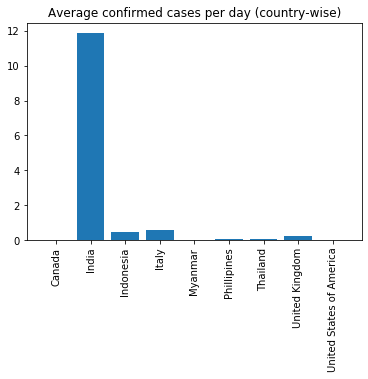

In [10]:
df1=df1[df1.nationality.notnull()]
df1.sort_values(['diagnosed_date'],inplace=True)
df2=df1.groupby(['diagnosed_date','nationality'])['id'].count()
df2=df2.unstack()
df2.fillna(0,inplace=True)
df2=df2.mean()
#plotting
plt.bar(df2.index,df2.values)
plt.xticks(df2.index,rotation=90)
plt.title('Average confirmed cases per day (country-wise)')

<h1> Question 3 <h1>

In [11]:
dfpop=Population_india_census2011.copy()

<h1> Question 4 <h1>

In [16]:
df4=IndividualDetails.copy()

# District=city list
district_equal_city=list(df4['detected_city'].loc[df4.detected_city==df4.detected_district].unique())

# dataframe where detected_city notnull
df41=df4[df4.detected_city.notnull()]

# dataframe where detected_city null and district is in the (district=city) list
df42=df4[(df4.detected_city.isnull()) & (df4.detected_district.isin(district_equal_city))]
# city Null value filled with district name 
df42.detected_city=df42.detected_district

#concatenate two dataframes
df4=pd.concat([df41.copy(),df42.copy()])

# Finding hotspots
count_per_city=df4.groupby(['detected_city'])['id'].count()
hotspot_series=count_per_city[count_per_city>=10]
hotspot_series

detected_city
Agra                   44
Ahmadabad              28
Ahmedabad              17
Bengaluru              48
Bhilwara               26
Bhopal                 15
Bodi                   13
Chandigarh             18
Chennai                82
Dehradun               11
Faridabad              14
Gandhinagar            13
Ghaziabad              13
Guntur                 27
Gurugram               31
Hyderabad              25
Indore                128
Jaipur                 48
Jhunjhunu              15
Jodhpur                16
Kannur                 45
Kasaragod             140
Madurai                17
Malappuram             11
Mettupalayam           20
Mumbai                243
Mysuru                 21
Nagpur                 13
Nizamuddin area        24
Noida                  12
Palwal                 17
Perundurai             17
Pune                   57
Rajkot                 10
Sangli                 25
Srinagar               13
Surat                  13
Thane                  2

<h1>Question 5<h1>

<h1> Question 8 <h1>

In [ ]:
df9=df.loc[(df.Date>='2020-03-01') & (df.Date<='2020-04-10')]
df9=df9.groupby(['Date'])['Confirmed'].sum()

#plotting
plt.figure(figsize=(15,6))
plt.plot(df9.index,df9.values)
plt.xticks(df9.index,rotation=90)
plt.title('Total confirmed cases')

